Игнат Поух

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings

In [4]:
df = pd.read_excel('price.xlsx')

In [5]:
#Переведем загловки столбцов в нижний регистр и посмотрим на данные

df.columns = map(str.lower, df.columns)
df.head(2)

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


#### 1. Построить корреляционную матрицу, выбрать факторы, которые в большей степени связаны с ценой

In [6]:
#Отбираем все колонки, кроме первой

list = df.columns[1:]
list

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [7]:
#Построим корреляционную матрицу

corr_m = df[list].corr()
corr_m

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Признак "rm" : коэффициент корреляции 0.6954


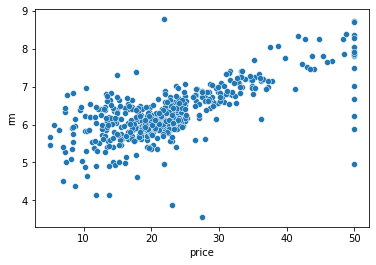

Признак "ptratio" : коэффициент корреляции -0.5078


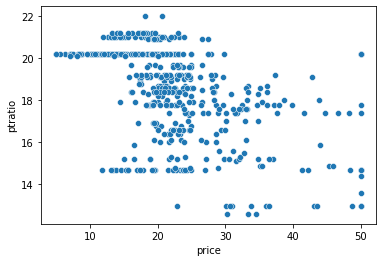

Признак "lstat" : коэффициент корреляции -0.7377


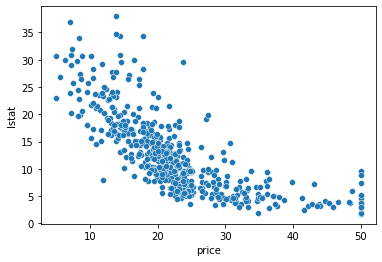

In [8]:
#Отбираем факторы, которые в большей степени связаны с ценой

for i in df.columns[:-1]:
    curr_corr = df[i].corr(df.price).round(4)
    if abs(curr_corr) >= 0.5:
        print("Признак \"" + i + "\" : коэффициент корреляции " + str(curr_corr))
        sns.scatterplot(x="price", y=i, data=df)
        plt.show()

#### 2. Построить линейную модель регрессии с включением одного фактора (построить несколько моделей с включением 1 фактора и сравнить их коэффициенты детерминации) (на исходных данных)

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
X1 = df[['rm']]
Y1 = df[['price']]

X2 = df[['ptratio']]
Y2 = df[['price']]

X3 = df[['rm']]
Y3 = df[['lstat']]

In [15]:
#model 1 Зависимость Price от Rm - среднего числа комнат жилого помещения
reg = LinearRegression()
model1 = reg.fit(X1, Y1)

const1 = model1.intercept_.round(2)[0]
coef1 = model1.coef_.round(2)[0]
print(model1.score(X1,Y1).round(4))

0.4835


In [16]:
#model 2 Зависимость Price от Ptratio - соотношение числа учеников к учителям
reg = LinearRegression()
model2 = reg.fit(X2, Y2)

const2 = model2.intercept_.round(2)[0]
coef2 = model2.coef_.round(2)[0]
print(model2.score(X2,Y2).round(4))

0.2578


In [17]:
#model 3 Зависимость Price от Lstat - % населения с низким социальным положением
reg = LinearRegression()
model3 = reg.fit(X3, Y3)

const3 = model3.intercept_.round(2)[0]
coef3 = model3.coef_.round(2)[0]
print(model3.score(X3,Y3).round(4))

0.3768


Наиболее качественная модель регрессии Price от Rm с коэф. детерм. R2 = 0.4835

#### 3. Описать модель

In [18]:
#model 1 Зависимость Price от Rm

print("Константа= " + str(const1),", коэф. регрессии= " + str(coef1))

Константа= -34.67 , коэф. регрессии= [9.1]


При увеличении на 1 фактора 'Rm', 'Price' увеличится на 9.1

In [19]:
#model 2 Зависимость Price от Ptratio

print("Константа= " + str(const2),", коэф. регрессии= " + str(coef2))

Константа= 62.34 , коэф. регрессии= [-2.16]


При увеличении на 1 фактора 'Ptratio', 'Price' уменьшится на 2.16

In [20]:
#model 3 Зависимость Price от Lstat

print("Константа= " + str(const3),", коэф. регрессии= " + str(coef3))

Константа= 51.86 , коэф. регрессии= [-6.24]


При увеличении на 1 фактора 'Lstat', 'Price' уменьшится на 6.24

#### 4.Описать значение коэффициента детерминации (что значит этот показатель в вашей конкретной модели) и оценить значимость коэффициентов регрессии

Коэффициент детерминации характеризует насколько точно описывается моделью изменчивость цены жилья

в модели 1: от фактора 'Rm' - среднего числа комнат жилого помещения

в модели 2: от показателя 'Ptratio' - соотношение численности учеников к учителям

в модели 3: от показателя 'Lstat' - % населения с низким социальным положением


Коэффициент детерминации 0.4835 модели 1 (Зависимость Price от Rm), что говорит о несильно высоком качестве модели (однако наиболее качественная модель из трех приведенных однофакторных моделей).

Коэффициент детерминации 0.2578 модели 2 (Зависимость Price от Ptratio), что является низким показателем качества модели.

Коэффициент детерминации 0.3768 модели 3 (Зависимость Price от Lstat) - невысокая точность модели.

In [21]:
import statsmodels.api as sm

In [22]:
# Модель 1 - оценка значимости коэффициентов регрессии

X1 = sm.add_constant(X1)
model_Rm = sm.OLS(Y1, X1)
results = model_Rm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        00:31:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

Поскольку p-value < 0.05 (уровня значимости), принимаем альтернативную гипотезу о том, что коэффициент при факторе "Rm" 
регресии значим.

In [23]:
# Модель 2 - оценка значимости коэффициентов регрессии

X2 = sm.add_constant(X2)
model_Ptratio = sm.OLS(Y2, X2)
results = model_Ptratio.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.61e-34
Time:                        00:31:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

Поскольку p-value < 0.05 (уровня значимости), принимаем альтернативную гипотезу о том, что коэффициент при факторе "Ptratio" 
регресии значим.

In [24]:
# Модель 3 - оценка значимости коэффициентов регрессии

X3 = sm.add_constant(X3)
model_Lstat = sm.OLS(Y3, X3)
results = model_Lstat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lstat   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     304.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.03e-53
Time:                        00:31:47   Log-Likelihood:                -1592.6
No. Observations:                 506   AIC:                             3189.
Df Residuals:                     504   BIC:                             3198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8594      2.260     22.946      0.0

Поскольку p-value < 0.05 (уровня значимости), принимаем альтернативную гипотезу о том, что коэффициент при факторе "Lstat" регресии значим.

#### 5. Построить модель множественной регрессии с несколькими факторами. Написать интерпретацию полученных коэффициентов регрессии, оценить значимость и коэффициент детерминации.

In [25]:
m = ['rm','lstat','ptratio']
m
X_m = df[m]

In [26]:
k = df.columns[-1]
Y_m = df[k]

In [27]:
# Множественная модель регрессии с переменными 'rm','lstat','ptratio'

X_m = sm.add_constant(X_m)
model_m = sm.OLS(Y_m, X_m)
results = model_m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          2.69e-123
Time:                        00:31:47   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

Все коэффициенты модели значимы (p-value = 0.000), модель имеет среднее качество (коэф-т детерминации 0.679) и более высокое относительно однофакторных моделей.

Коэффициенты могут быть интерпретированы следующим образом:

- При увеличении фактора 'Rm' (числа комнат) на 1 цена жилья увеличиться на 4.51 при неизменности остальных факторов.

- При увеличении фактора 'Lstat' (% населения с низким соц. положением) на 1 цена жилья уменьшится на 0.57 при неизменности остальных факторов

- При увеличении фактора 'Ptratio' (отношения численности учащихся к учителям) на 1 цена жилья уменьшится на 0.93 при неизменности остальных факторов

In [28]:
# Между переменными 'Rm' и 'Lstat' есть связь (R = -0.61), 
# что может вызывать мультиколлинеарность в модели и сделать R^2 завышенным

X_m.corr()

,const,rm,lstat,ptratio
const,NaN,NaN,NaN,NaN
rm,NaN,1.000000,-0.613808,-0.355501
lstat,NaN,-0.613808,1.000000,0.374044
ptratio,NaN,-0.355501,0.374044,1.000000


In [29]:
# Для регрессии оставим показатель 'lstat', поскольку он имел более высокий коэффициент корреляции с 'prices'

q = ['lstat','ptratio']
q
X_q = df[q]

In [30]:
# Множественная модель регрессии с переменными 'lstat','ptratio'

X_q = sm.add_constant(X_q)
model_q = sm.OLS(Y_m, X_q)
results = model_q.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     387.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.22e-102
Time:                        00:31:48   Log-Likelihood:                -1604.2
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     503   BIC:                             3227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0468      2.242     24.105      0.0

Все коэффициенты модели значимы (p-value = 0.000), модель имеет приемлимое качество (коэф-т детерминации 0.6)

#### 6. Можно ли улучшить полученную модель множественной регрессии? (например, посмотреть распределения независимых переменных и, возможно, провести какие-то преобразования с переменными)

Признак 'rm'


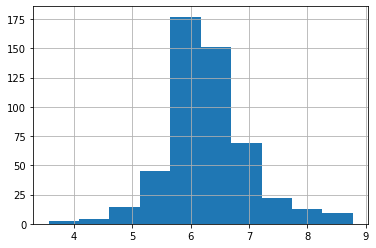

Признак 'lstat'


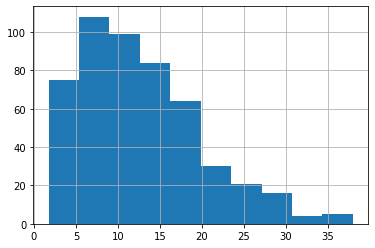

Признак 'ptratio'


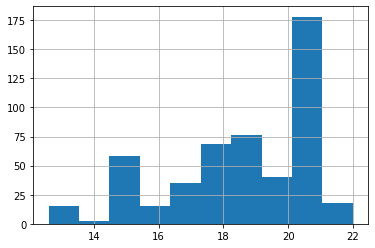

In [40]:
m = ['rm','lstat','ptratio']
for i in m:
        print("Признак '" + i + "'")
        df[i].hist()
        plt.show()

In [44]:
# Признак 'lstat' судя по графику выше можеть иметь логнормальное распределение
# Возьмем логарифмы по этому показателю, оставим в модели только следующие НП: 'ptratio' и логарифм по 'lstat'

df['lstat_log']=np.log(df.lstat)

p = ['lstat_log','ptratio']
X_log = df[p]

In [46]:
X_log.head(3)

,lstat_log,ptratio
0,1.605430,15.3
1,2.212660,17.8
2,1.393766,17.8


In [47]:
# Множественная модель регрессии с переменными log('lstat'),'ptratio'

X_log = sm.add_constant(X_log)
model_log = sm.OLS(Y_m, X_log)
results = model_log.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     584.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          7.22e-132
Time:                        00:46:35   Log-Likelihood:                -1536.5
No. Observations:                 506   AIC:                             3079.
Df Residuals:                     503   BIC:                             3092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.9709      1.933     33.603      0.0

Все коэффициенты модели значимы (p-value = 0.000), модель имеет более высокое качество после взятия логарифма по 'lstat' (коэф-т детерминации 0.69)